In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, mean_absolute_error, mean_squared_error
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.multiclass import OneVsRestClassifier
import pickle
import os
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['font.family'] = ['Dejavu Sans']

In [3]:
df = pd.read_csv(r"C:\Users\Acer\Desktop\knn model\winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df['quality'].duplicated().sum()

np.int64(1593)

In [7]:
print(f"Data Shape: {df.shape}")

Data Shape: (1599, 12)


In [8]:
print(f"Null:\n{df.isnull().sum()}")

Null:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [9]:
print(df['quality'].value_counts().sort_index())

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64


In [10]:
feature_names = [col for col in df.columns if col != 'quality']
print(f"Features: {len(feature_names)}")

Features: 11


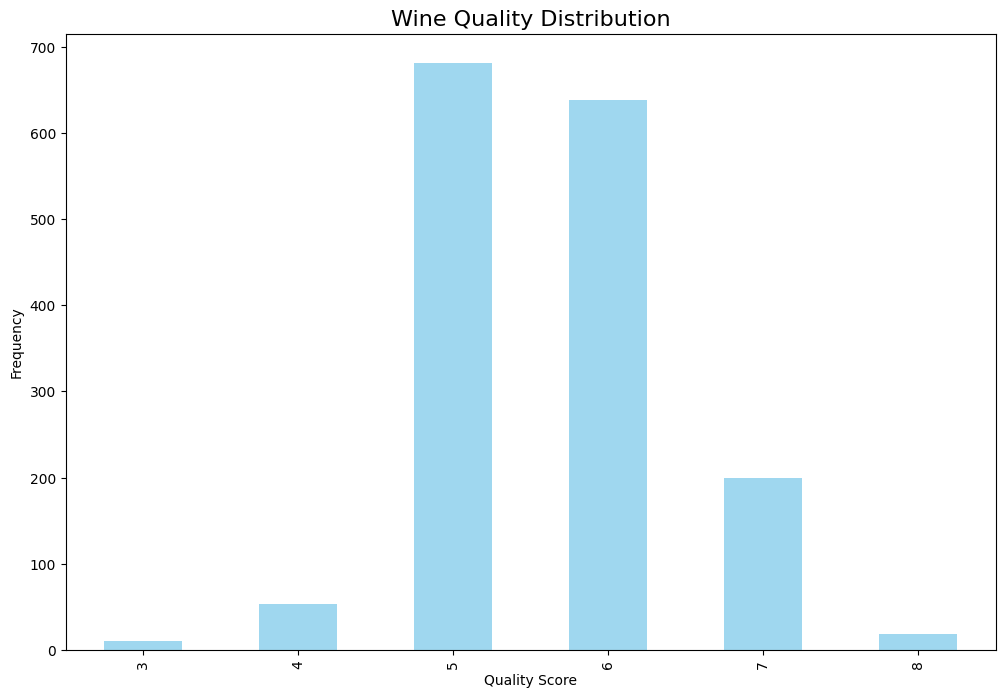

In [11]:
plt.figure(figsize=(12, 8))
df['quality'].value_counts().sort_index().plot(kind='bar', color='skyblue', alpha=0.8)
plt.title('Wine Quality Distribution', fontsize=16)
plt.xlabel('Quality Score')
plt.ylabel('Frequency')
plt.show()


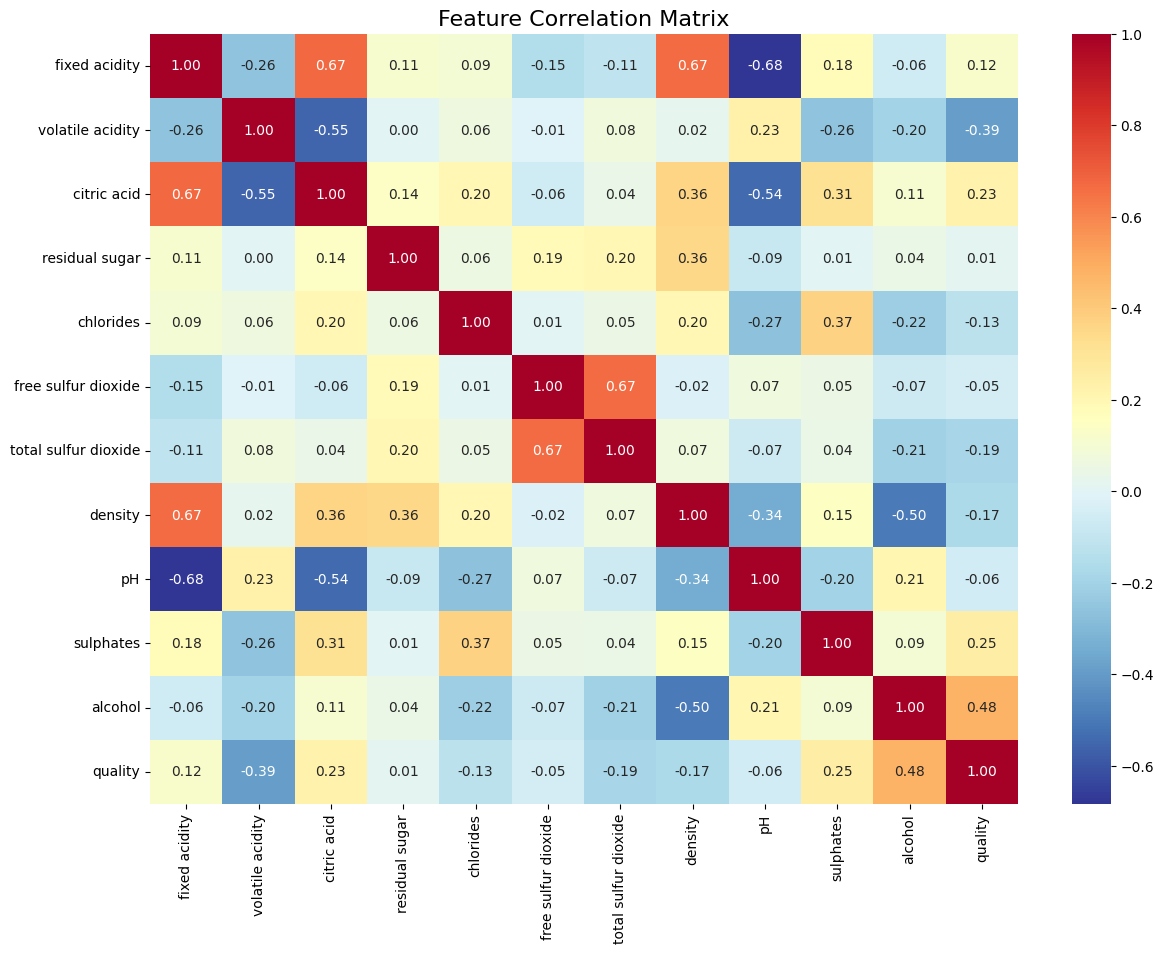

In [12]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap='RdYlBu_r', fmt='.2f')
plt.title('Feature Correlation Matrix', fontsize=16)
plt.show()


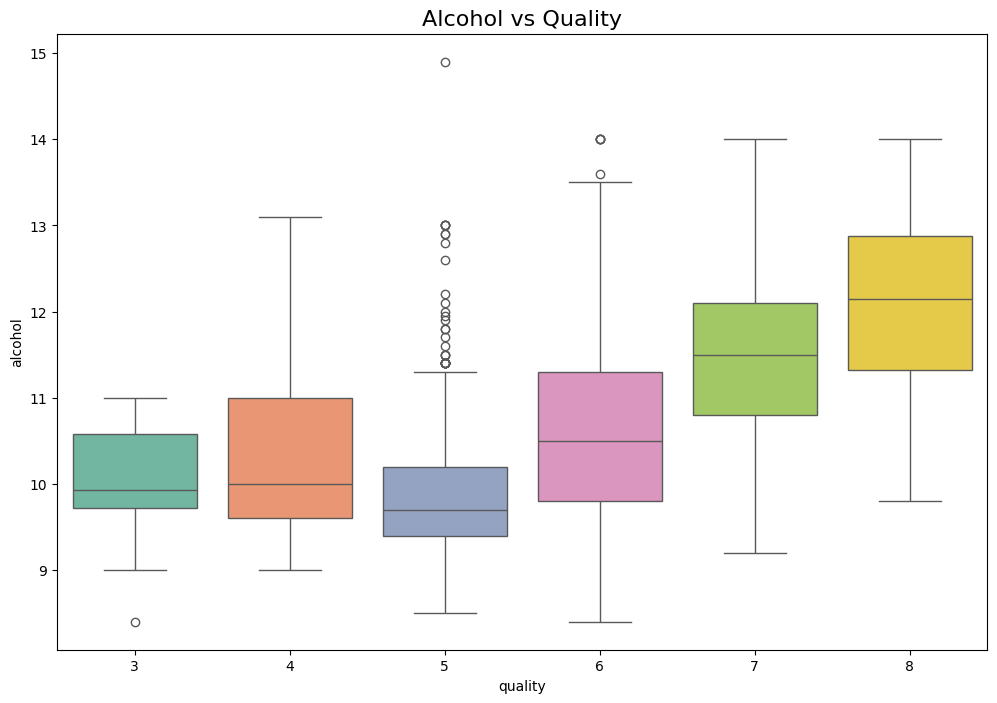

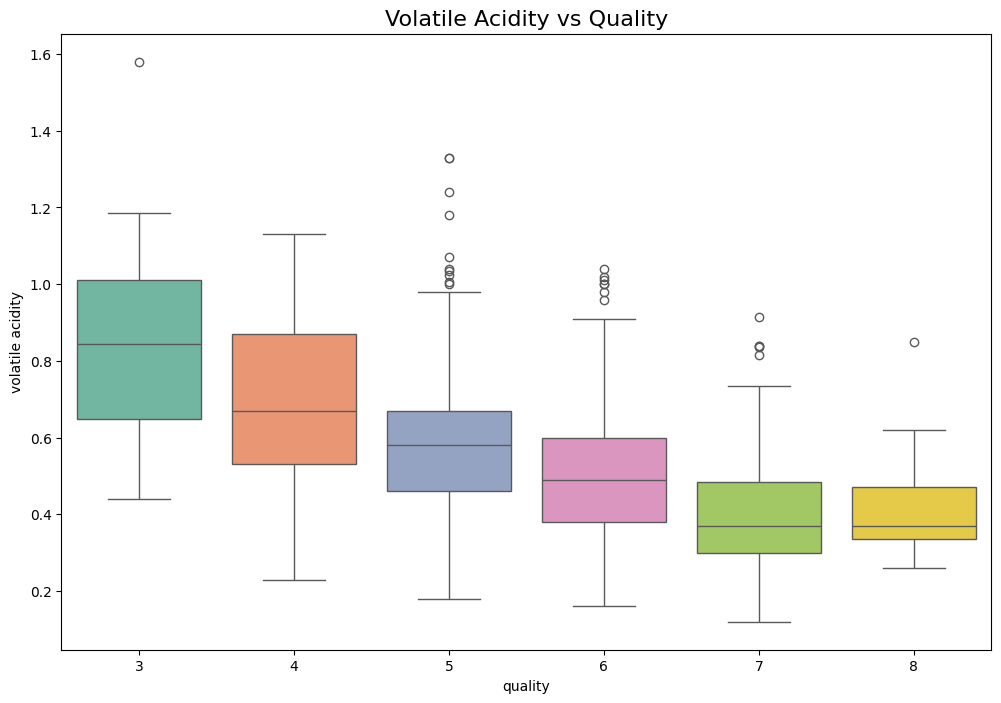

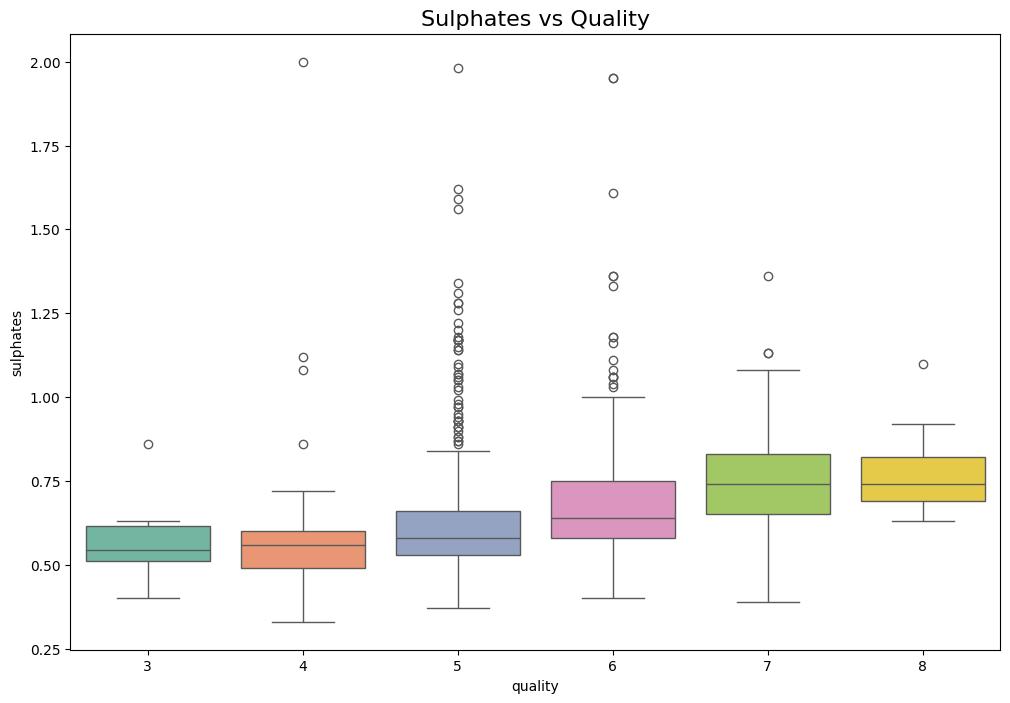

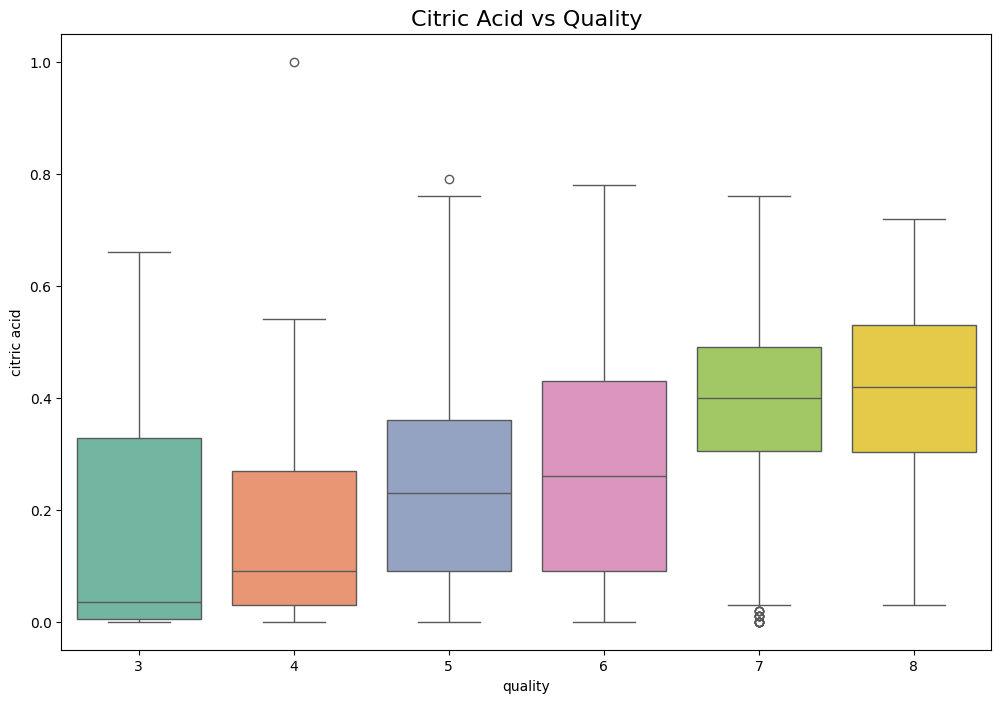

In [13]:
features = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid']

for f in features:
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='quality', y=f, data=df, palette='Set2')
    plt.title(f'{f.replace("_", " ").title()} vs Quality', fontsize=16)
    plt.show()


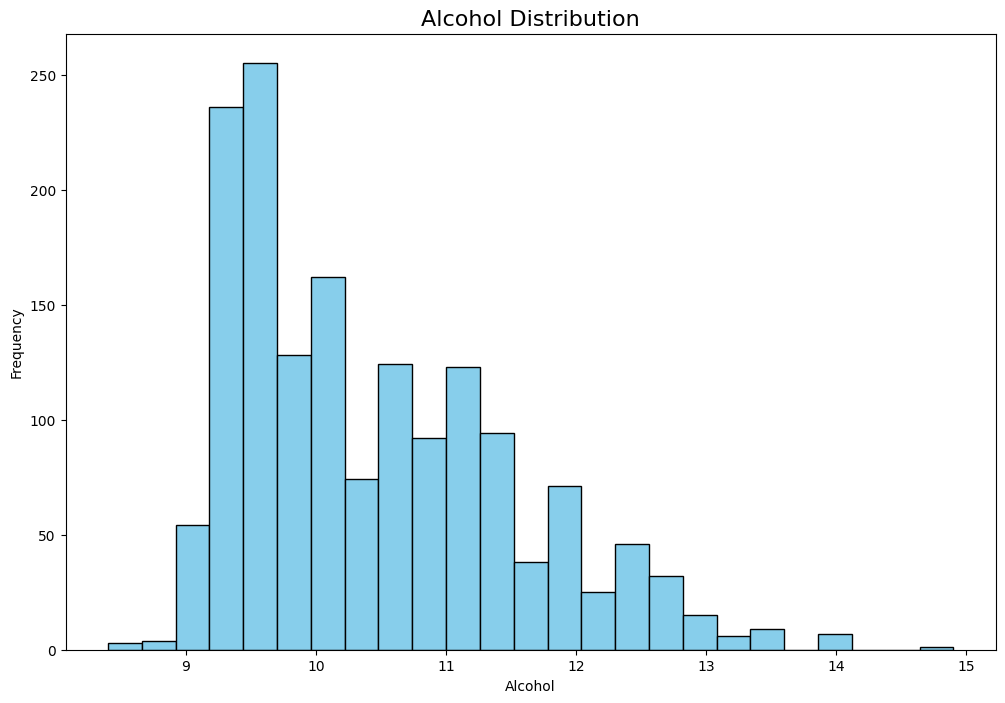

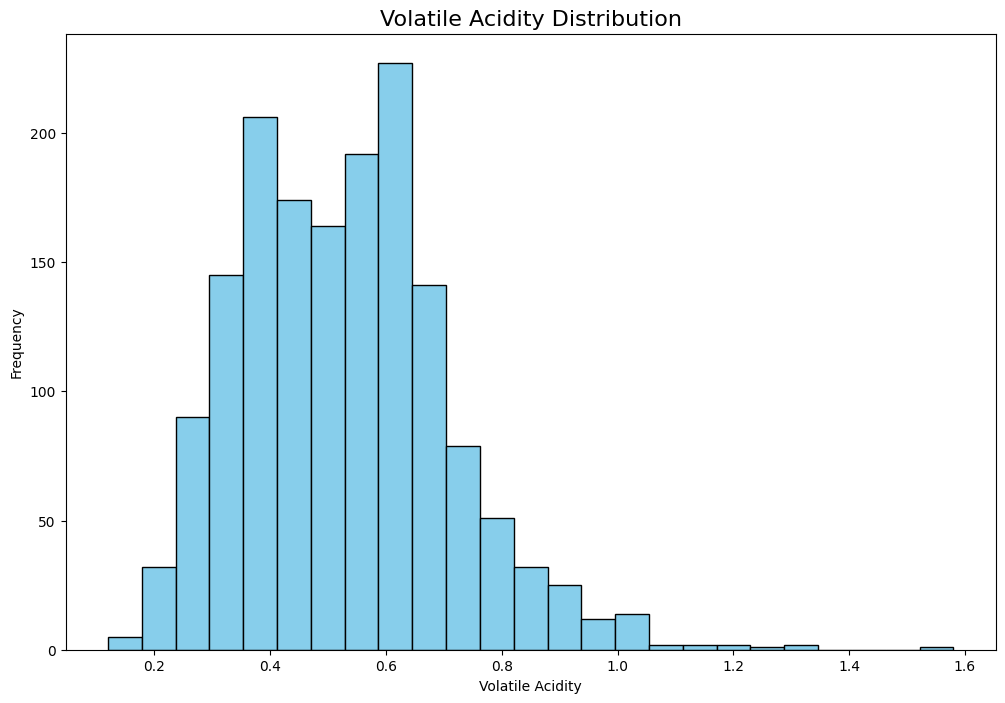

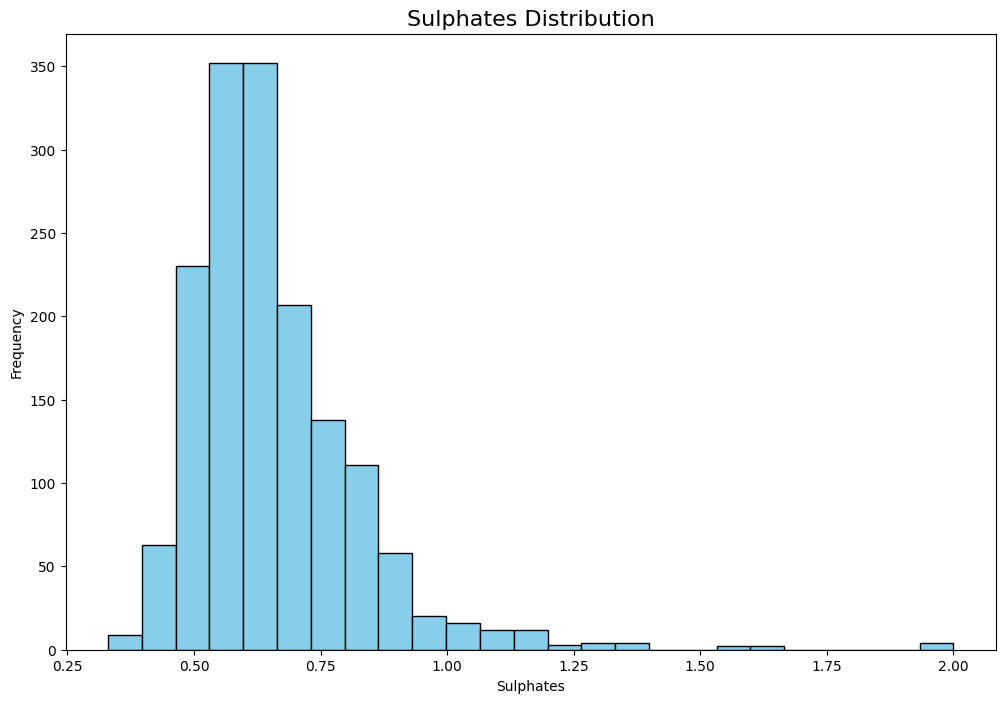

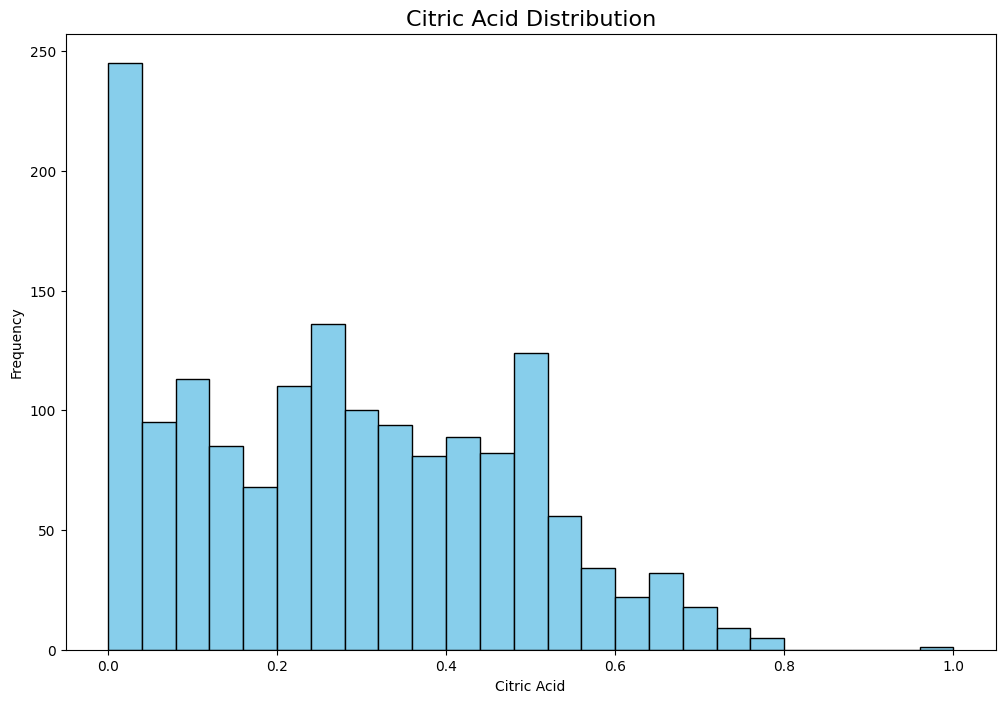

In [14]:
for f in features:
    plt.figure(figsize=(12, 8))
    plt.hist(df[f], bins=25, color='skyblue', edgecolor='black')
    plt.title(f'{f.replace("_", " ").title()} Distribution', fontsize=16)
    plt.xlabel(f.replace("_", " ").title())
    plt.ylabel("Frequency")
    plt.show()

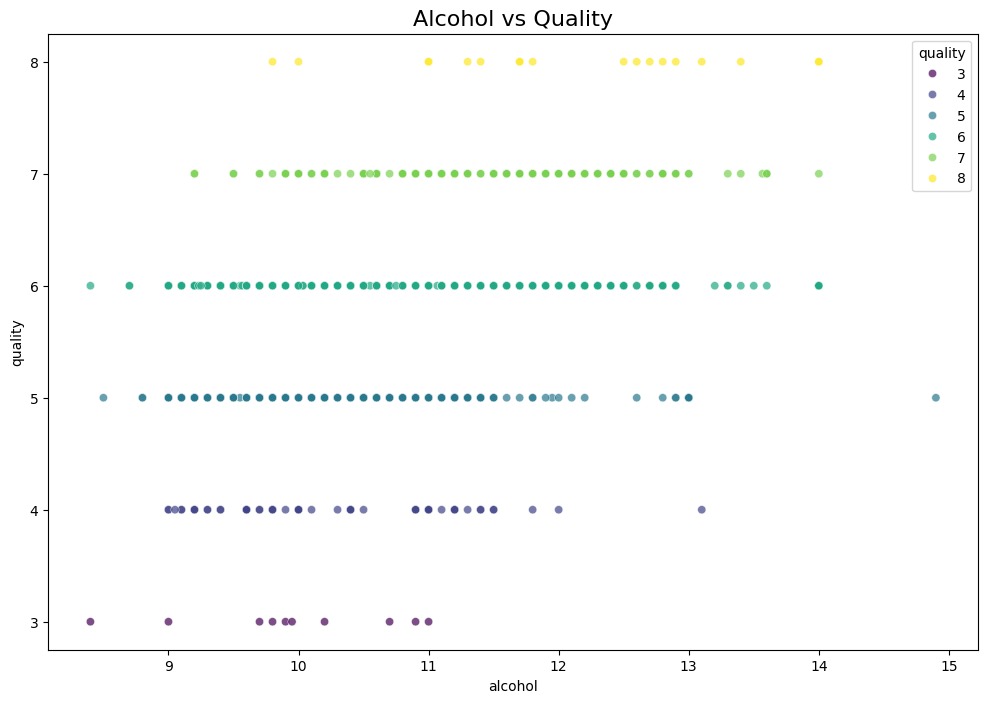

In [15]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='alcohol', y='quality', hue='quality', data=df, palette='viridis', alpha=0.7)
plt.title('Alcohol vs Quality', fontsize=16)
plt.show()

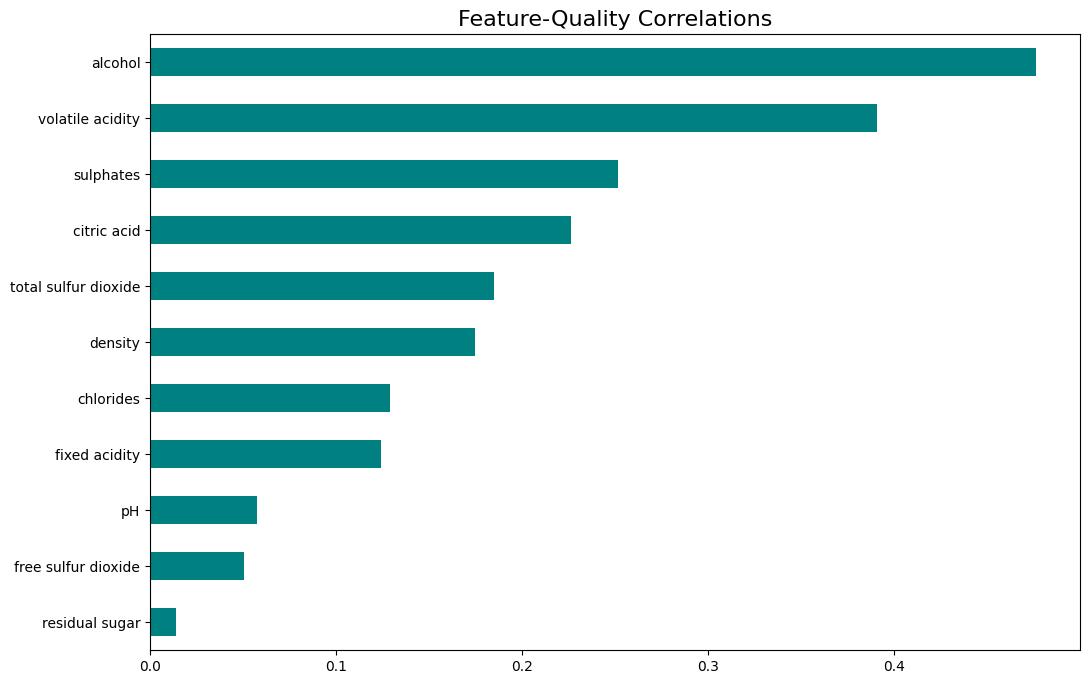

In [16]:
plt.figure(figsize=(12, 8))
corr = df.corr()['quality'].drop('quality').abs().sort_values()
corr.plot(kind='barh', color='teal')
plt.title('Feature-Quality Correlations', fontsize=16)
plt.show()


### Preprocessing

In [17]:
X = df.drop('quality', axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print('-'*50)
print(f"Training set quality distribution:\n{pd.Series(y_train).value_counts().sort_index()}")
print('-'*50)
print(f"Test set quality distribution:\n{pd.Series(y_test).value_counts().sort_index()}")

Training set size: (1279, 11)
Test set size: (320, 11)
--------------------------------------------------
Training set quality distribution:
quality
3      8
4     42
5    545
6    510
7    159
8     15
Name: count, dtype: int64
--------------------------------------------------
Test set quality distribution:
quality
3      2
4     11
5    136
6    128
7     40
8      3
Name: count, dtype: int64


### Feature Selection

In [20]:
selector_f = SelectKBest(f_classif, k=8)
X_train_selected_f = selector_f.fit_transform(X_train_scaled, y_train)

In [21]:
selector_mi = SelectKBest(mutual_info_classif, k=8)
X_test_scaled_mi = selector_mi.fit_transform(X_train_scaled, y_train)

In [22]:
selected_features_f = [feature_names[i] for i in selector_f.get_support(indices=True)]
selected_features_mi = [feature_names[i] for i in selector_mi.get_support(indices=True)]

print("F-Score ile secilen en yaxsi 8 features")
for i , feature in enumerate(selected_features_f, 1):
    score = selector_f.scores_[feature_names.index(feature)]
    print(f"   {i}. {feature:25} ---->    {score:.3f}")

print('='*50)

print("Mutual-information ile secilen en yaxsi 8 features")
for i , feature in enumerate(selected_features_mi, 1):
    score = selector_mi.scores_[feature_names.index(feature)]
    print(f"   {i}. {feature:25}  ---->  {score:.3f}")

F-Score ile secilen en yaxsi 8 features
   1. volatile acidity          ---->    48.714
   2. citric acid               ---->    13.570
   3. chlorides                 ---->    4.216
   4. free sulfur dioxide       ---->    4.836
   5. total sulfur dioxide      ---->    22.398
   6. density                   ---->    13.279
   7. sulphates                 ---->    14.562
   8. alcohol                   ---->    97.163
Mutual-information ile secilen en yaxsi 8 features
   1. fixed acidity              ---->  0.042
   2. volatile acidity           ---->  0.122
   3. citric acid                ---->  0.065
   4. free sulfur dioxide        ---->  0.041
   5. total sulfur dioxide       ---->  0.077
   6. density                    ---->  0.080
   7. sulphates                  ---->  0.121
   8. alcohol                    ---->  0.179


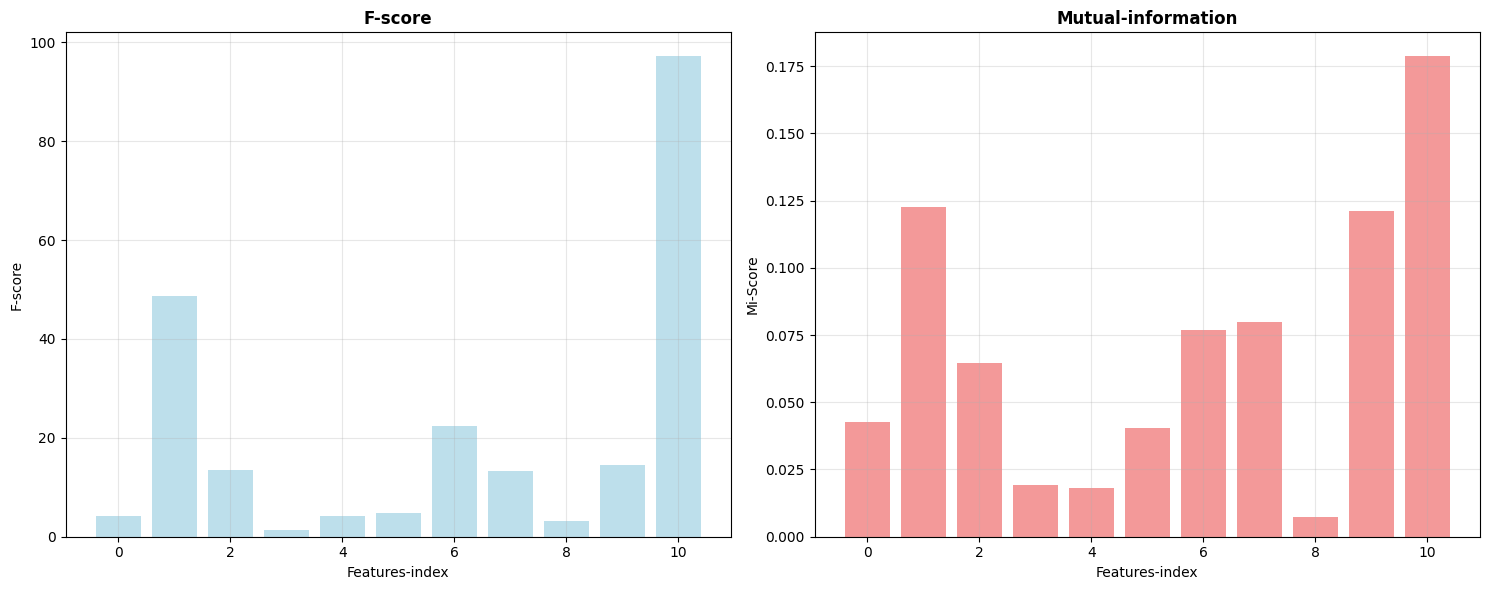

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

f_scores = selector_f.scores_
ax1.bar(range(len(f_scores)), f_scores, color='lightblue', alpha=0.8)
ax1.set_title('F-score', fontweight='bold')
ax1.set_xlabel('Features-index')
ax1.set_ylabel('F-score')
ax1.grid(True, alpha=0.3)

mi_scores = selector_mi.scores_
ax2.bar(range(len(mi_scores)), mi_scores, color='lightcoral', alpha=0.8)
ax2.set_title("Mutual-information", fontweight='bold')
ax2.set_xlabel('Features-index')
ax2.set_ylabel('Mi-Score')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Training Multiple Machine Learning Models 

In [24]:
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Bootsing': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'SVM (RBF)': SVC(probability=True, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Neural Network': MLPClassifier(random_state=42, max_iter=500, hidden_layer_sizes=(100, 50))   
}

In [25]:
results = {}
model_predictions = {}

for name, model in models.items():
    print(f"{model} training")
    cv_scores = cross_val_score(model,X_train_scaled, y_train, cv=5, scoring='accuracy')
    
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_pred)

    results[name] = {
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'test_accuracy': test_accuracy,
        'model': model}
    model_predictions[name] = y_pred

    print(f" CV - results : {cv_scores.mean():.4f} {cv_scores.std()*2:.4f}")
    print(f" Accuracy : {test_accuracy:.4f}")
    print('='*80)

RandomForestClassifier(random_state=42) training
 CV - results : 0.6771 0.0397
 Accuracy : 0.6750
GradientBoostingClassifier(random_state=42) training
 CV - results : 0.6544 0.0371
 Accuracy : 0.6500
SVC(probability=True, random_state=42) training
 CV - results : 0.6255 0.0408
 Accuracy : 0.6250
LogisticRegression(max_iter=1000, random_state=42) training
 CV - results : 0.5973 0.0499
 Accuracy : 0.5906
KNeighborsClassifier() training
 CV - results : 0.5661 0.0629
 Accuracy : 0.6094
DecisionTreeClassifier(random_state=42) training
 CV - results : 0.5895 0.0307
 Accuracy : 0.6094
MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42) training
 CV - results : 0.6294 0.0473
 Accuracy : 0.6188


In [26]:
sorted_results = sorted(results.items(), key=lambda x: x[1]['test_accuracy'], reverse=True)

for i , (name, metrics) in enumerate(sorted_results, 1):
    print(f" {i}. {name:25}  |  Test: {metrics['test_accuracy']:.4f} |  CV: Mean --> {metrics['cv_mean']:.4f}  Std --> {metrics['cv_std']*2:.4f}")

 1. Random Forest              |  Test: 0.6750 |  CV: Mean --> 0.6771  Std --> 0.0397
 2. Gradient Bootsing          |  Test: 0.6500 |  CV: Mean --> 0.6544  Std --> 0.0371
 3. SVM (RBF)                  |  Test: 0.6250 |  CV: Mean --> 0.6255  Std --> 0.0408
 4. Neural Network             |  Test: 0.6188 |  CV: Mean --> 0.6294  Std --> 0.0473
 5. K-Nearest Neighbors        |  Test: 0.6094 |  CV: Mean --> 0.5661  Std --> 0.0629
 6. Decision Tree              |  Test: 0.6094 |  CV: Mean --> 0.5895  Std --> 0.0307
 7. Logistic Regression        |  Test: 0.5906 |  CV: Mean --> 0.5973  Std --> 0.0499


In [27]:
best_model_name = sorted_results[0][0]
best_model = results[best_model_name]['model']
best_accuracy = results[best_model_name]['test_accuracy']

print(f" Best Model :  {best_model_name}")
print(f" Accuracy :  {best_accuracy:.4f}")

 Best Model :  Random Forest
 Accuracy :  0.6750


### Hyperparameter Optimization of the Best Model

In [28]:
if 'Random Forest' in best_model_name:
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20 , 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2']
    }
    base_model = RandomForestClassifier(random_state=42)

elif 'Gradient Boosting' in best_model_name:
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7, 10],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 0.9, 1.0],
        'min_samples_split': [2, 5, 10]
    }
    base_models = GradientBoostingClassifier(random_state=42)

elif 'SVM' in best_model_name:
    param_grid = {
        'C': [0,1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
        'kernel': ['rbf', 'poly', 'linear']
    }
    base_model = SVC(probability=True, random_state=42)

elif 'Logistic Regression' in best_model_name:
    param_grid = {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2', 'elasticnet'],
        'solver': ['liblinear', 'saga'],
        'l1_ratio': [0.15, 0.5, 0.7],
    }
    base_model = LogisticRegression(random_state=42, max_iter=1000)

elif 'K-Nearest Neighbors' in best_model_name:
    param_grid = {
        'n_neighbors': [3, 5, 7, 9, 11, 15],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski'],
        'p': [1, 2]
    }
    base_model = KNeighborsClassifier()

elif 'Desicion Tree' in best_model_name:
    param_grid = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 5, 10, 15, 20],
        'min_samples_split': [2, 5, 10, 20],
        'min_samples_leaf': [1, 2, 4, 8],
        'max_features': ['auto', 'sqrt', 'log2', None]
    }
    base_model = DecisionTreeClassifier(random_state=42)

elif 'Neural Network' in best_model_name:
    param_grid = {
        'hidden_layer_sizes': [(50,), (100,), (100,50), (100,100), (200,100)],
        'activation': ['relu', 'tanh', 'logistic'],
        'solver': ['adam', 'lbfgs'],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate': ['constant', 'adaptive']
    }
    base_model = MLPClassifier(random_state=42, max_iter=1000)

else:
    param_grid = {}
    base_model = best_model


if param_grid:
    grid_search = GridSearchCV(base_model, param_grid, cv = 5, scoring='accuracy', n_jobs=-1, verbose=1)
    grid_search.fit(X_train_scaled, y_train)

    optimized_model = grid_search.best_estimator_
    optimized_pred = optimized_model.predict(X_test_scaled)
    optimized_accuracy = accuracy_score(y_test, optimized_pred)

    for param, value in grid_search.best_params_.items():
        print(f" {param} ---> {value}") 

    print(f" Simple Model Accuracy ---> {best_accuracy:.4f}")
    print(f" Optimization Model Accuracy ---> {optimized_accuracy:.4f}")
    print(f" Improvement ---> {(optimized_accuracy - best_accuracy):.4f}")

    if optimized_accuracy > best_accuracy:
        best_model = optimized_model
        best_accuracy = optimized_accuracy
        print("  The optimized model will be used")
    else:
        print('  The orginal model performans is better')

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
 max_depth ---> None
 max_features ---> sqrt
 min_samples_leaf ---> 1
 min_samples_split ---> 5
 n_estimators ---> 100
 Simple Model Accuracy ---> 0.6750
 Optimization Model Accuracy ---> 0.6781
 Improvement ---> 0.0031
  The optimized model will be used


### Comprehensive Model Evaluation

In [29]:
final_predictions = best_model.predict(X_test_scaled)
final_accuracy = accuracy_score(y_test, final_predictions)
print(f" Final Accuray Score ---> {final_accuracy:.4f}")

 Final Accuray Score ---> 0.6781


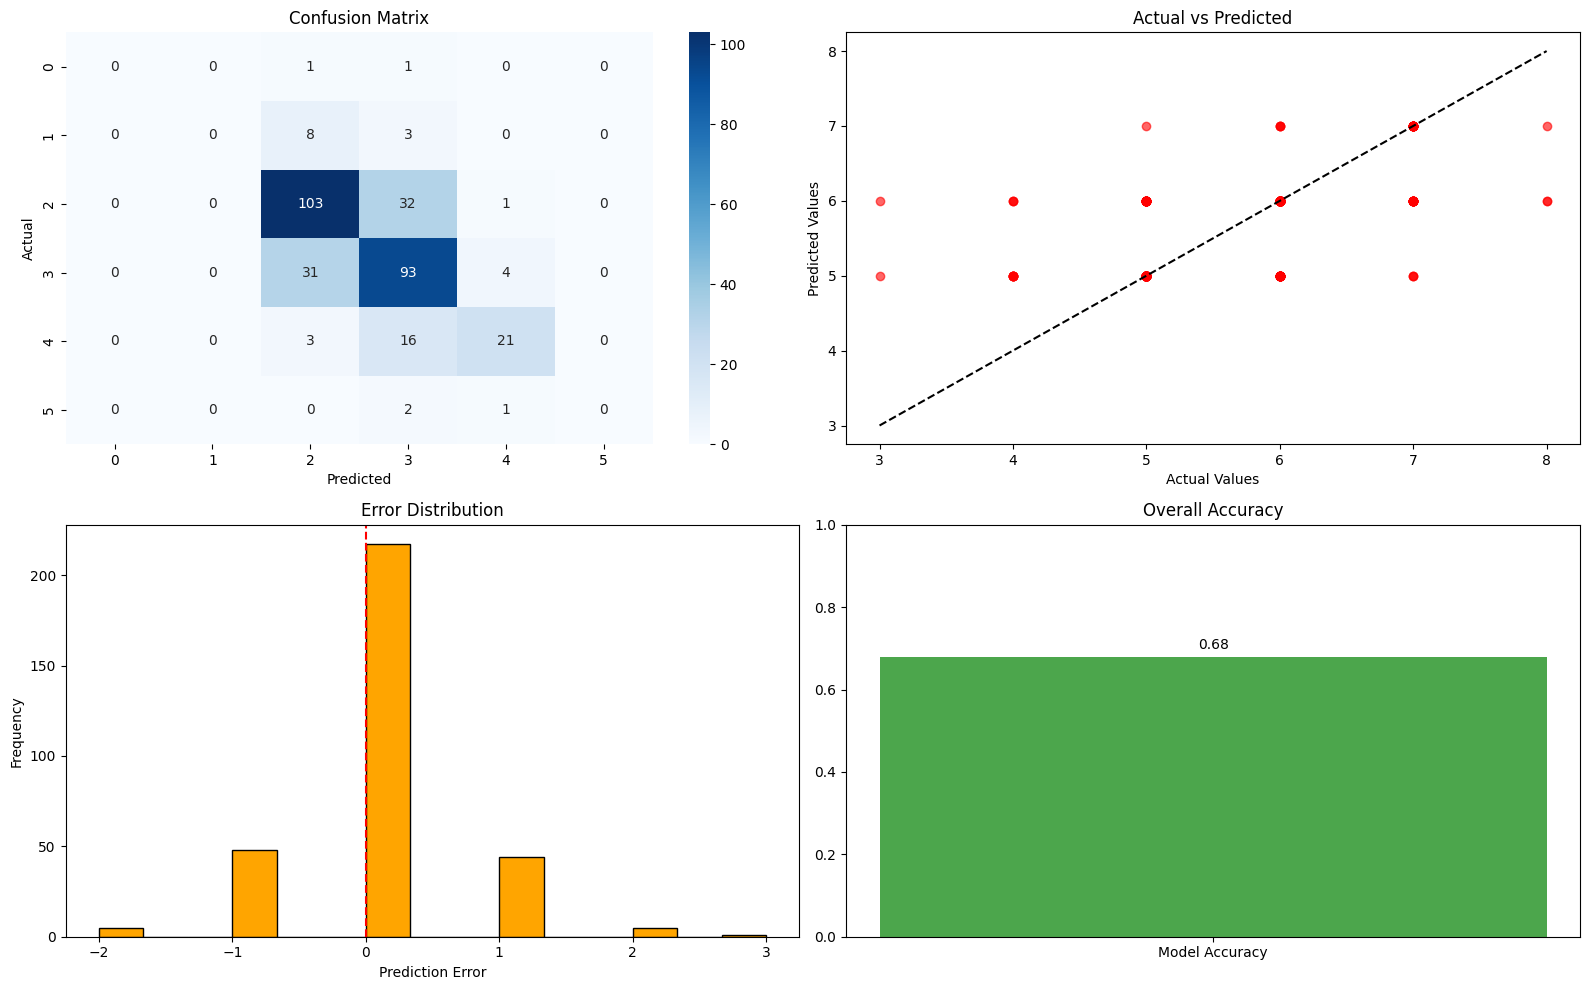

In [30]:
fig = plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
cm = confusion_matrix(y_test, final_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(2, 2, 2)
plt.scatter(y_test, final_predictions, alpha=0.6, color="red")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--")
plt.title("Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

plt.subplot(2, 2, 3)
errors = final_predictions - y_test
plt.hist(errors, bins=15, color="orange", edgecolor="black")
plt.axvline(x=0, color="red", linestyle="--")
plt.title("Error Distribution")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")

plt.subplot(2, 2, 4)
acc = accuracy_score(y_test, final_predictions)
plt.bar(["Model Accuracy"], [acc], color="green", alpha=0.7)
plt.ylim(0, 1)
plt.title("Overall Accuracy")
plt.text(0, acc + 0.02, f"{acc:.2f}", ha="center")

plt.tight_layout()
plt.show()


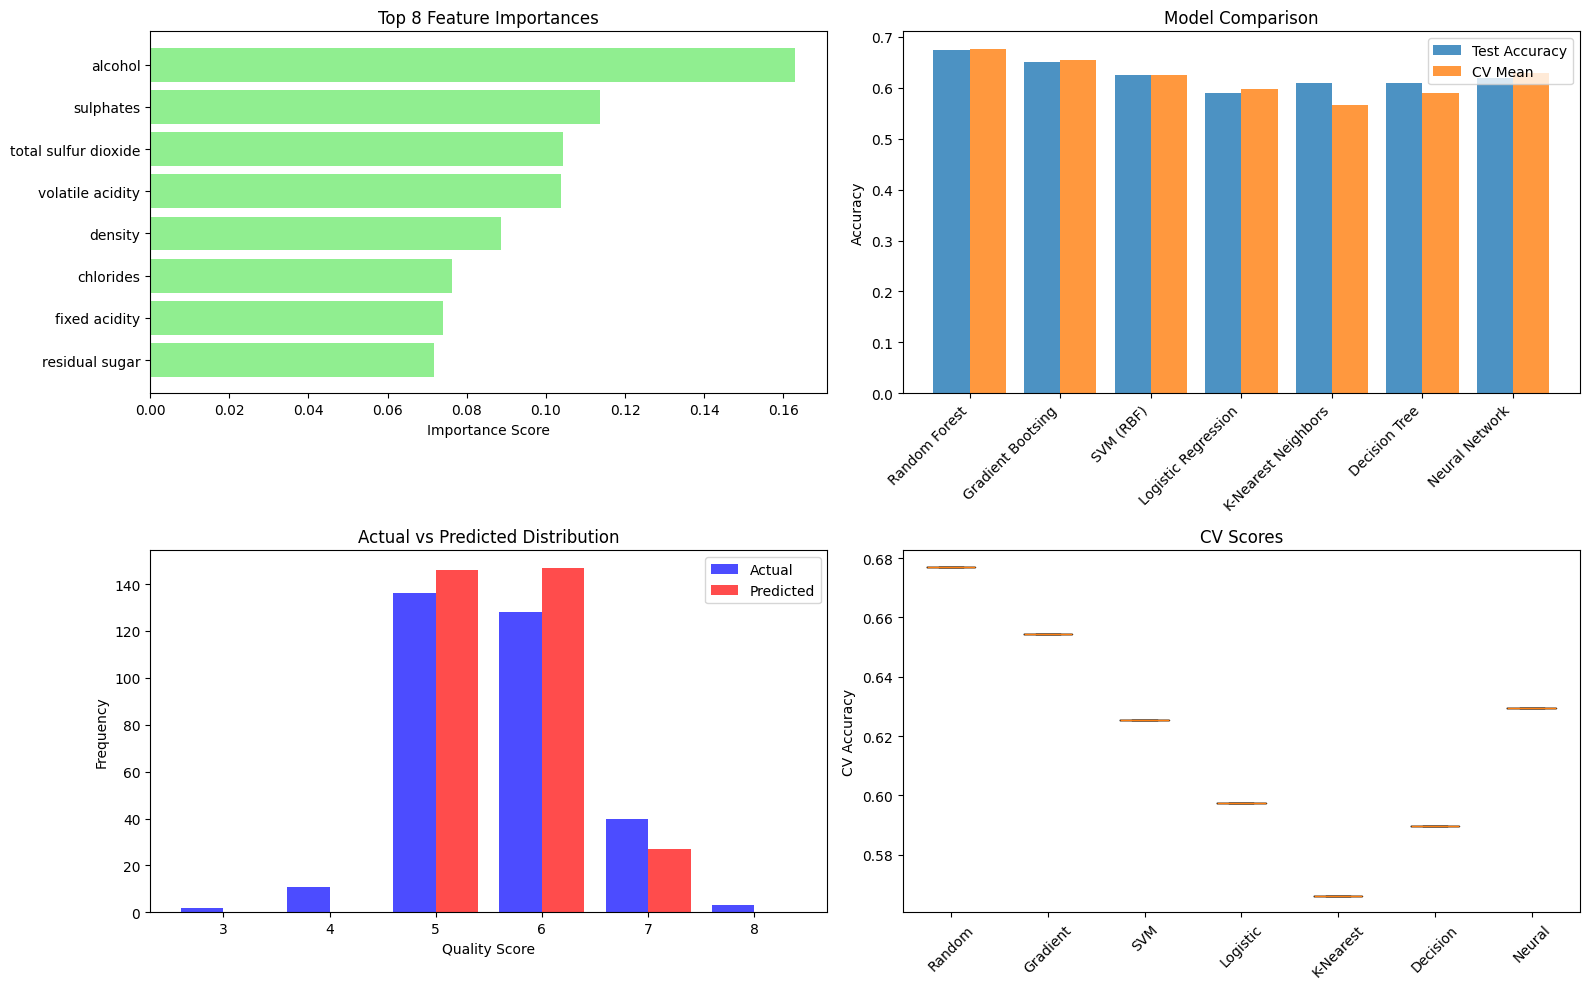

In [31]:
fig = plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
if hasattr(best_model, "feature_importances_"):
    importances = best_model.feature_importances_
    indices = np.argsort(importances)[::-1][:8]  
    plt.barh(range(len(indices)), importances[indices], color="lightgreen")
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel("Importance Score")
    plt.title("Top 8 Feature Importances")
    plt.gca().invert_yaxis()

plt.subplot(2, 2, 2)
model_names = list(results.keys())
test_accuracies = [metrics['test_accuracy'] for metrics in results.values()]
cv_means = [metrics['cv_mean'] for metrics in results.values()]
x_pos = np.arange(len(model_names))
plt.bar(x_pos - 0.2, test_accuracies, 0.4, label="Test Accuracy", alpha=0.8)
plt.bar(x_pos + 0.2, cv_means, 0.4, label="CV Mean", alpha=0.8)
plt.xticks(x_pos, model_names, rotation=45, ha="right")
plt.title("Model Comparison")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(2, 2, 3)
plt.hist([y_test, final_predictions], bins=np.arange(2.5, 9.5, 1), label=["Actual", "Predicted"], alpha=0.7, color=["blue", "red"])
plt.xlabel("Quality Score")
plt.ylabel("Frequency")
plt.title("Actual vs Predicted Distribution")
plt.legend()

plt.subplot(2, 2, 4)
cv_scores_list = [results[name]['model'].cv_results_['test_score'] if hasattr(results[name]['model'], 'cv_results_') else [results[name]['cv_mean']] * 5 for name in results.keys()]
plt.boxplot(cv_scores_list, labels=[name.split()[0] for name in results.keys()])
plt.title("CV Scores")
plt.ylabel("CV Accuracy")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


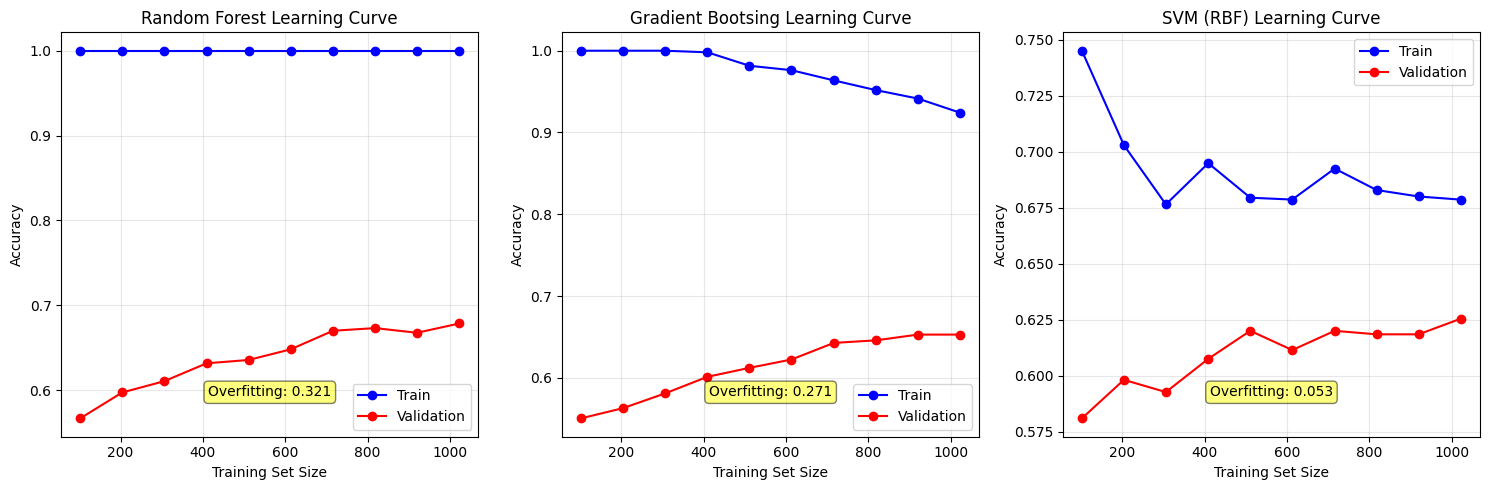

Learning Curve Analysis:
  Random Forest: Train-Validation gap = 0.327
High overfitting risk
  Gradient Bootsing: Train-Validation gap = 0.306
High overfitting risk
  SVM (RBF): Train-Validation gap = 0.064
Acceptable generalization


In [32]:
top_3_models = sorted_results[:3]
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, (model_name, metrics) in enumerate(top_3_models):
    model = metrics['model']
    
    train_sizes, train_scores, val_scores = learning_curve(
        model, X_train_scaled, y_train, cv=5,
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='accuracy', n_jobs=-1)
    
    train_mean = np.mean(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    
    ax = axes[idx]
    ax.plot(train_sizes, train_mean, 'o-', color='blue', label='Train')
    ax.plot(train_sizes, val_mean, 'o-', color='red', label='Validation')
    
    ax.set_title(f"{model_name} Learning Curve")
    ax.set_xlabel("Training Set Size")
    ax.set_ylabel("Accuracy")
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    gap = train_mean[-1] - val_mean[-1]
    if gap > 0.05:
        ax.text(0.5, 0.1, f"Overfitting: {gap:.3f}", transform=ax.transAxes, ha='center', bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))
    else:
        ax.text(0.5, 0.1, f"Generalization OK: {gap:.3f}", transform=ax.transAxes, ha='center', bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))

plt.tight_layout()
plt.show()

print("Learning Curve Analysis:")
for model_name, metrics in top_3_models:
    model = metrics['model']
    train_sizes, train_scores, val_scores = learning_curve(model, X_train_scaled, y_train, cv=5, train_sizes=[0.8], scoring='accuracy')
    gap = np.mean(train_scores) - np.mean(val_scores)
    print(f"  {model_name}: Train-Validation gap = {gap:.3f}")
    if gap > 0.1:
        print("High overfitting risk")
    elif gap < 0.02:
        print("Excellent generalization")
    else:
        print("Acceptable generalization")


### Model Storage 

In [41]:
model_data = {
    'model': best_model,
    'scaler': scaler,
    'feature_names': feature_names,
    'model_name': best_model_name,
    'accuracy': best_accuracy}

with open("wine_quality_model.pkl", "wb") as f:
    pickle.dump(model_data, f)

### Model Predict

In [39]:
# Sample wine features (11 features)
sample_wines = [
    [7.0, 0.6, 0.08, 1.8, 0.070, 20.0, 50.0, 0.9960, 3.35, 0.65, 10.5],  # Expected medium quality
    [5.5, 0.3, 0.35, 1.2, 0.045, 15.0, 40.0, 0.9920, 3.25, 0.75, 12.8],  # Expected high quality
    [8.5, 1.2, 0.02, 3.5, 0.120, 35.0, 120.0, 0.9980, 3.10, 0.45, 8.5]   # Expected low quality
]

wine_descriptions = [
    "Medium-level wine (balanced features)",
    "Premium wine (high alcohol, low acidity)",
    "Low-quality wine (high acidity, low alcohol)"]

print("Sample wine predictions:")
print("="*50)

for i, (wine_features, description) in enumerate(zip(sample_wines, wine_descriptions), 1):
    wine_features_scaled = scaler.transform([wine_features])
    prediction = best_model.predict(wine_features_scaled)[0]
    
    if hasattr(best_model, 'predict_proba'):
        probabilities = best_model.predict_proba(wine_features_scaled)[0]
        confidence = np.max(probabilities)
        
        print('-'*50)
        print(f"Wine Sample {i}: {description}")
        print(f" Predicted quality: {prediction}")
        print(f" Confidence level: {confidence:.3f}")
        
        # Show the top 3 most probable quality classes
        classes = best_model.classes_
        top_indices = np.argsort(probabilities)[::-1][:3]
        
        print("   Probability distribution:")
        for idx in top_indices:
            prob = probabilities[idx]
            quality = classes[idx]
            print(f"     Quality {quality}: {prob:.3f}")
    else:
        print(f"\n🍷 Wine Sample {i}: {description}")
        print(f"   Predicted quality: {prediction}")

Sample wine predictions:
--------------------------------------------------
Wine Sample 1: Medium-level wine (balanced features)
 Predicted quality: 6
 Confidence level: 0.557
   Probability distribution:
     Quality 6: 0.557
     Quality 5: 0.365
     Quality 7: 0.071
--------------------------------------------------
Wine Sample 2: Premium wine (high alcohol, low acidity)
 Predicted quality: 7
 Confidence level: 0.451
   Probability distribution:
     Quality 7: 0.451
     Quality 6: 0.394
     Quality 8: 0.107
--------------------------------------------------
Wine Sample 3: Low-quality wine (high acidity, low alcohol)
 Predicted quality: 5
 Confidence level: 0.763
   Probability distribution:
     Quality 5: 0.763
     Quality 6: 0.159
     Quality 4: 0.075
